# TRAVAIL DU GROUPE 4 : ALGORITHME KNN

### Membres du groupe

1. Typologie des données

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Exploration des données

Importation du dataset

In [155]:
#df = pd.read_csv("breast-cancer-dataset.csv")
df = pd.read_csv("brca.csv")
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [136]:
df.shape

(569, 32)

### 1. Typologie des données

Nous utilisons la methode info() pour ce faire

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

Nous avons 3 type de données dans notre dataset : 
* int64 (entier), 
* float64 (reelles), 
* object (objets)

### 2. Le sommaire des principales caractéristiques du dataset

La fonction describe() est utilisée pour voire les différentes caractéristiques de nos donnees
* La **moyenne**, le **minimum**, le **maximum**, etc. de chaque colones

In [138]:
df.describe()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.radius_worst,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,285.000000,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,164.400426,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,143.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,285.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,427.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,569.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 3. Exploration des données en utilisant des méthodes visuelles

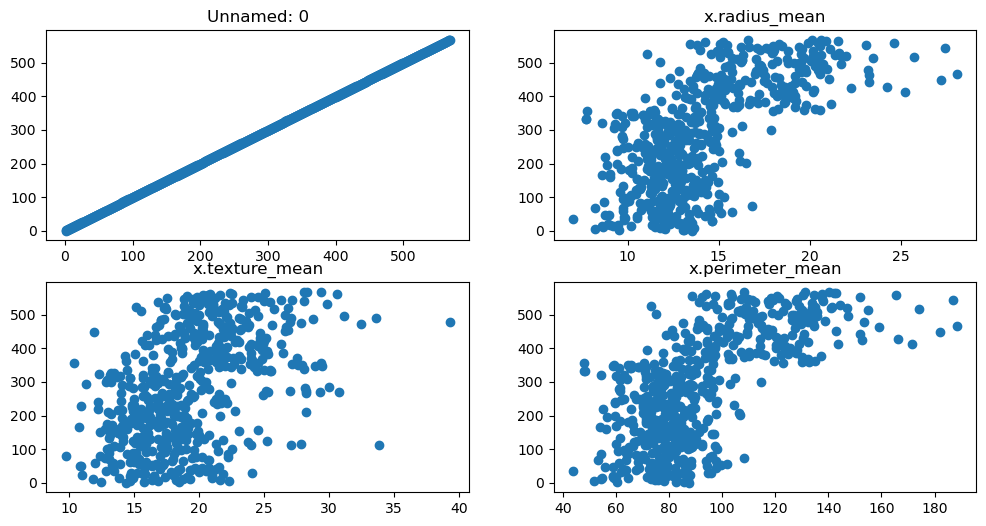

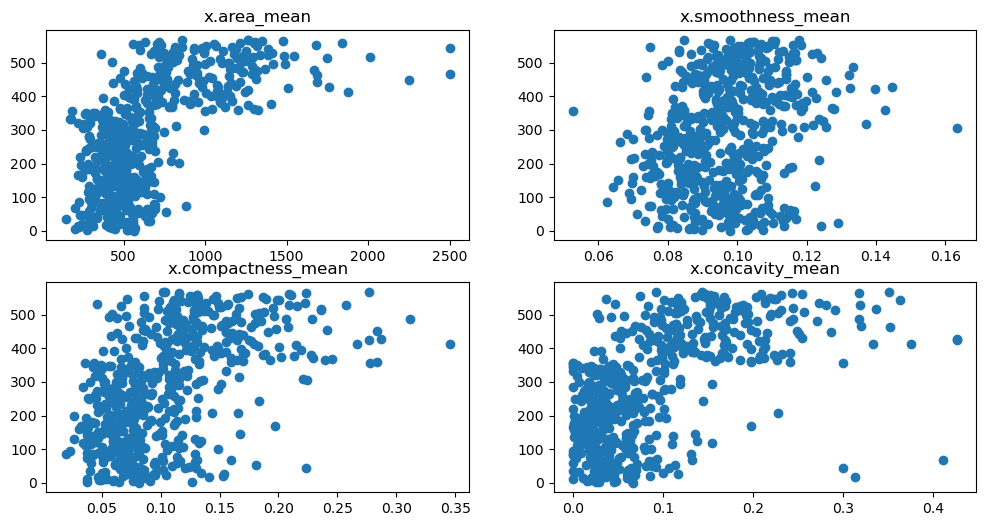

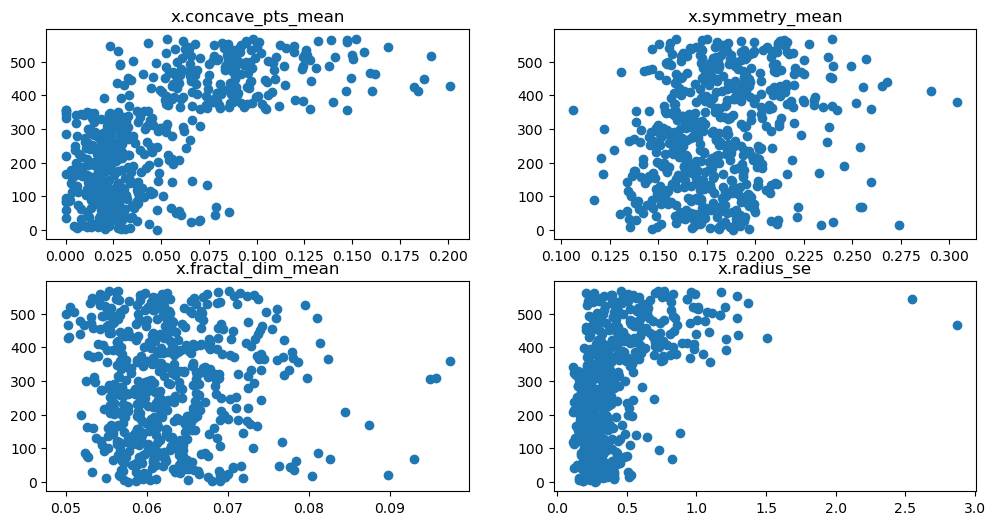

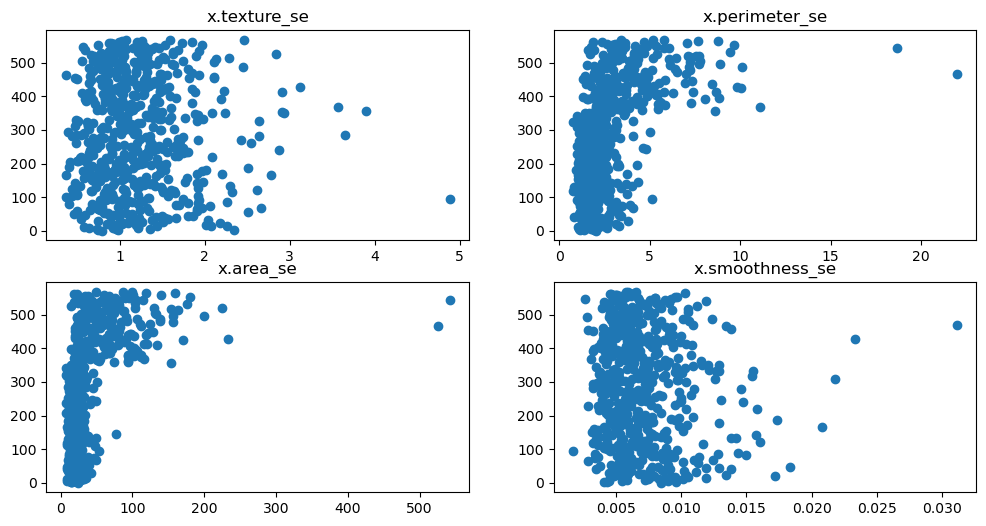

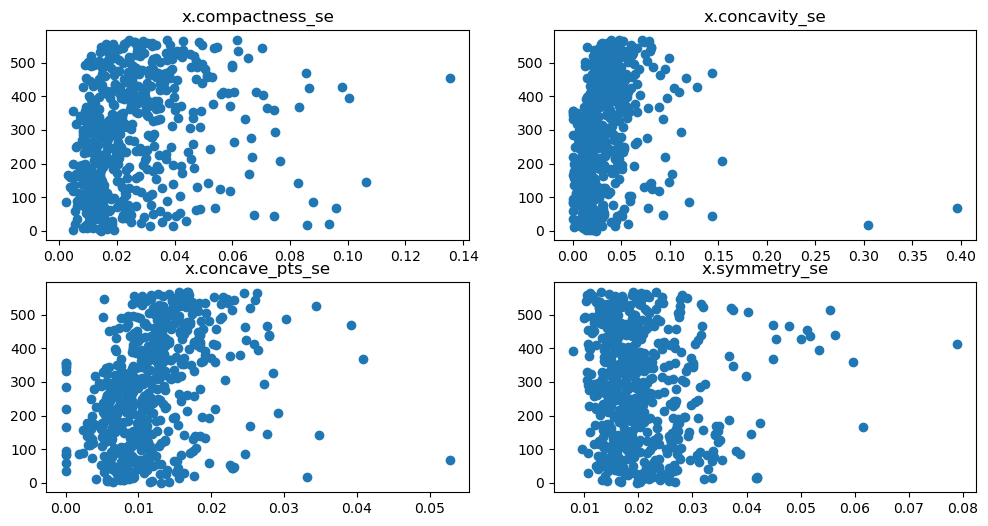

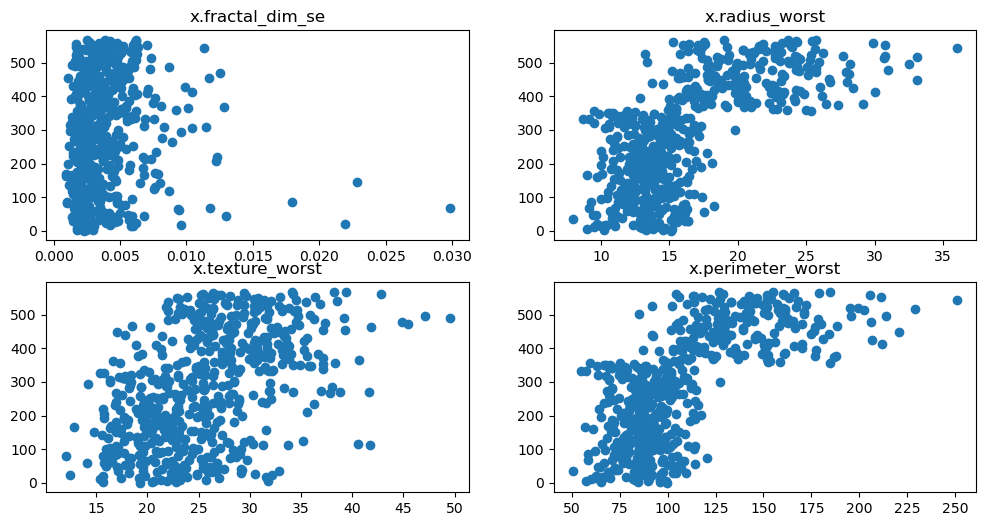

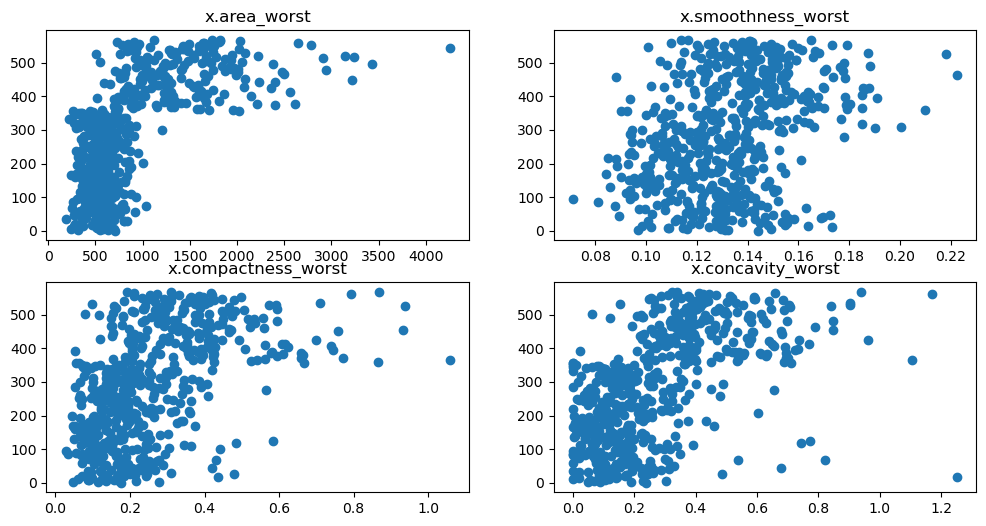

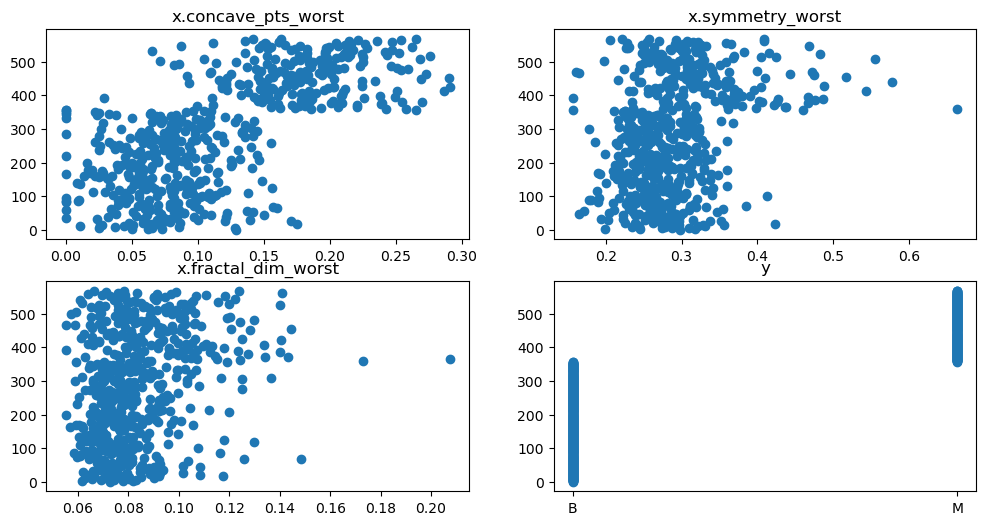

In [139]:
columns = df.columns
fig = plt.figure(figsize=(12, 6))
k = 221
for c in columns:
    if k == 225:
        plt.show()
        fig = plt.figure(figsize=(12, 6))
        k = 221
        
    ax = fig.add_subplot(k)
    plt.scatter(df[c], range(df.shape[0]))
    ax.title.set_text(c)
    plt.plot()
    k += 1

## EDA : Exploratory Data Analysis

Dans notre travail, il est question de prédire si un individus est atteint du cancer de sein. Nous devrons donc trouver la classe d'appartenance d'un individus dans les deux classes possibles : 
* **Malade**
* **Saint**

Nous utiliserons la variable **y** comme **target** et les autres comme **features**



#### 1. Transformation des données catégorielles

Dans notre dataset, seul la variable **y** contient les variables categorielles.

Nous transformeront donc:
* **M en 1** pour les individus atteint du cancer, 
* **B en 0** pour les individus bénins

Pour cela, nous allons utiliser la methode **replace()**

In [156]:
df = df.replace({"y" : {"M" : 1, "B" : 0}})
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,0
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,0
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,0
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,0
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,0


#### 2. Gerons a present les Données manquantes

Les methodes **info()** et **describe()** nous permettent deja de savoir s'il y a des donnees manquantes.

Nous allons plutot utiliser la methode **isnull()** et sommer le nombre de valeur manquante avec **sum()**



In [141]:
df.isnull().sum()

Unnamed: 0             0
x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

Ainsi nous voyons que notre dataset n'a pas de données manquante.

Si c'etait le cas nous auriont utilisé les methodes **dropna()** ou **fillna()** pour supprimer ou remplir les valeurs manquantes

#### 3 Gérons les Données abérrantes

Pour ce faire nous allons utiliser les methodes visuelles présentées plus haut.

La fonction **scatter** de matplotlib nous permet de voire les données qui s'écartent de la normale.

Nous utiliserons pour la suite un ***boxplot***

In [142]:
df.columns

Index(['Unnamed: 0', 'x.radius_mean', 'x.texture_mean', 'x.perimeter_mean',
       'x.area_mean', 'x.smoothness_mean', 'x.compactness_mean',
       'x.concavity_mean', 'x.concave_pts_mean', 'x.symmetry_mean',
       'x.fractal_dim_mean', 'x.radius_se', 'x.texture_se', 'x.perimeter_se',
       'x.area_se', 'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y'],
      dtype='object')

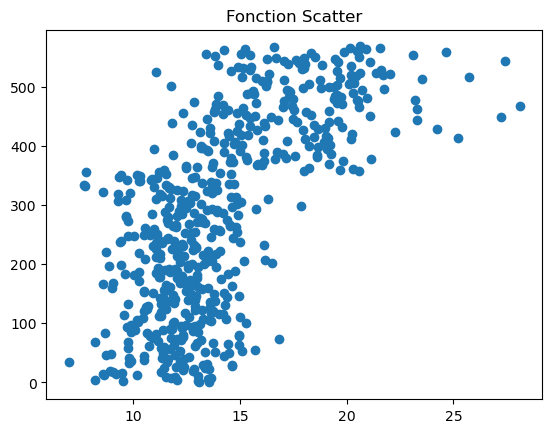

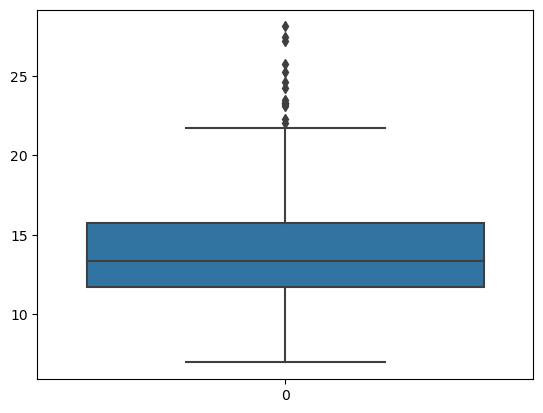

In [143]:
plt.scatter(df["x.radius_mean"], range(df.shape[0]))
plt.title("Fonction Scatter")
plt.show()
essai = sb.boxplot(df["x.radius_mean"])

Nous voyons qu'a partir d'environ **22** les valeur s'écatent des autres. 

Nous supprimerons toutes les lignes qui ont ces valeurs là. Nous obtenons donc ceci:

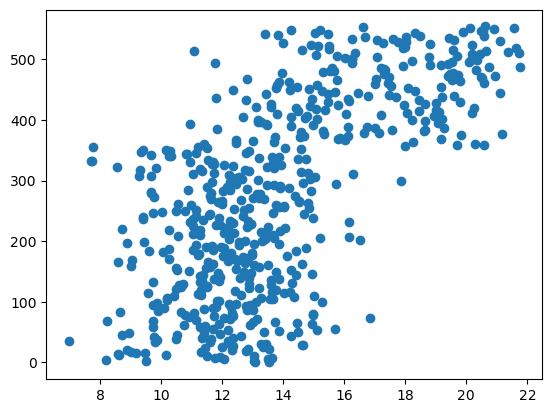

<Axes: >

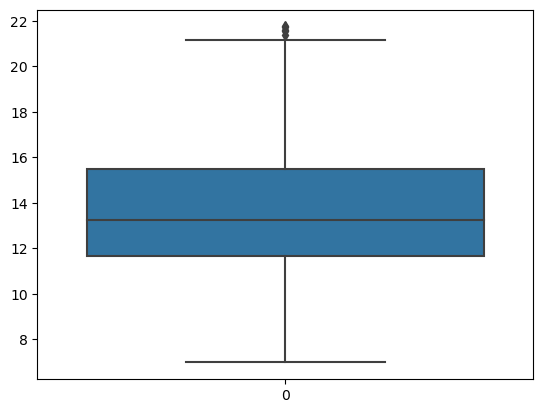

In [144]:
for i in range(df.shape[0]):
    if df["x.radius_mean"][i] > 22:
        df = df.drop([i])
        
plt.scatter(df["x.radius_mean"], range(df.shape[0]))
plt.show()
sb.boxplot(df["x.radius_mean"])

Nous ferons ainsi pour toutes les colones

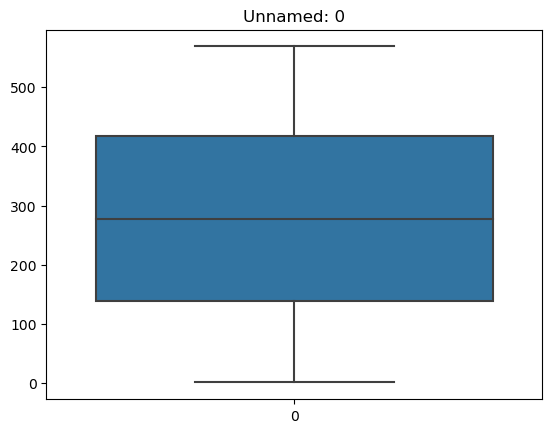

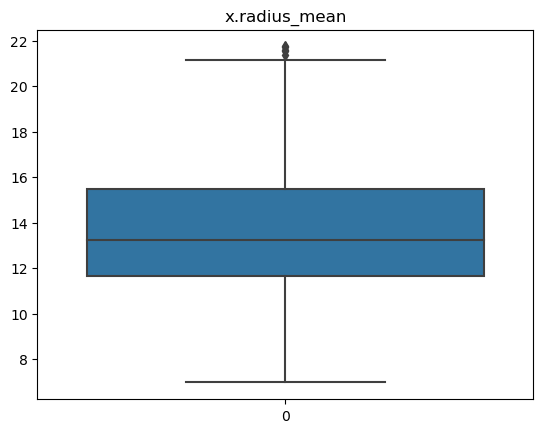

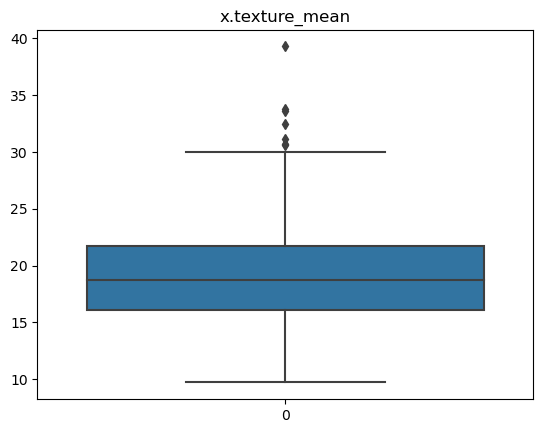

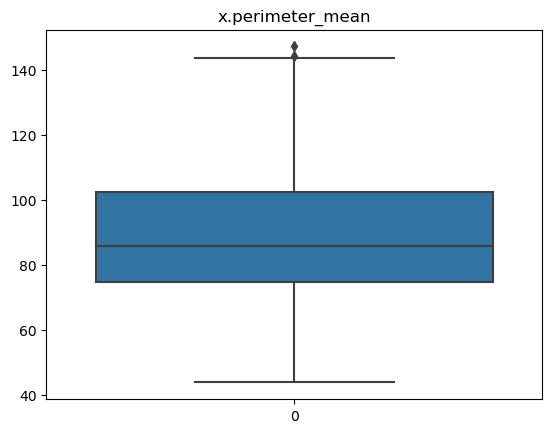

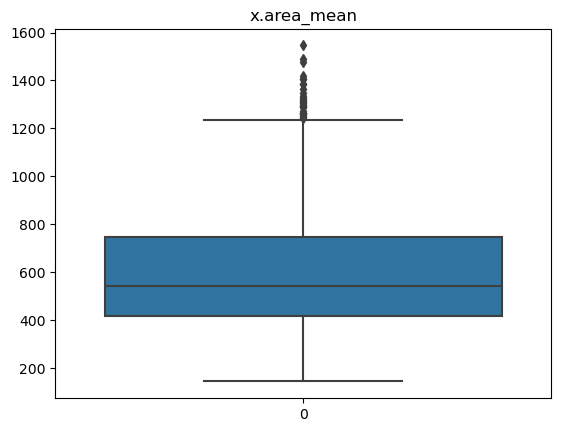

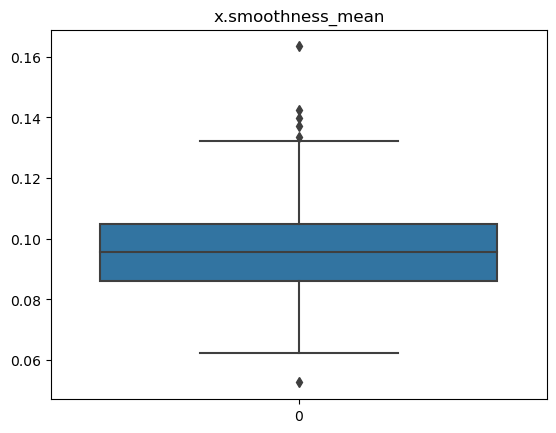

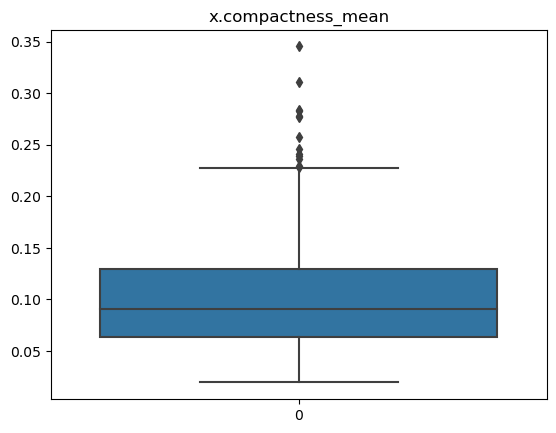

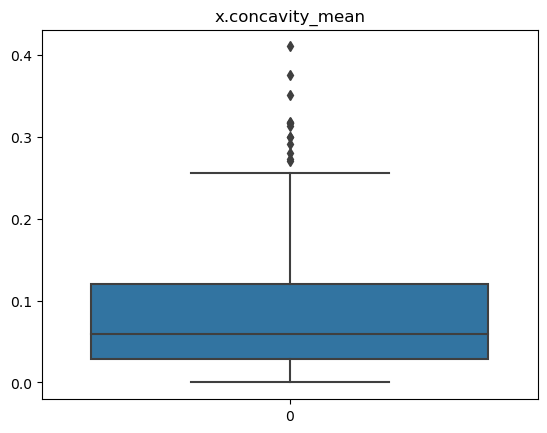

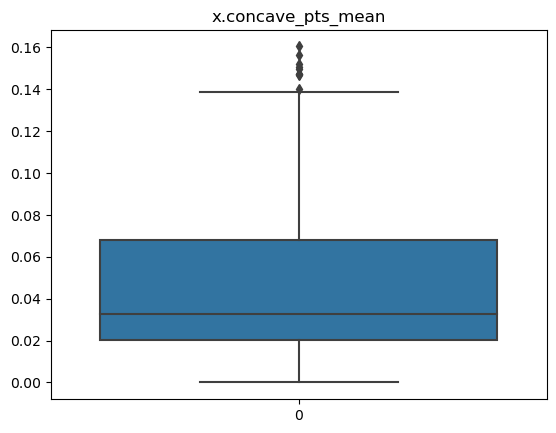

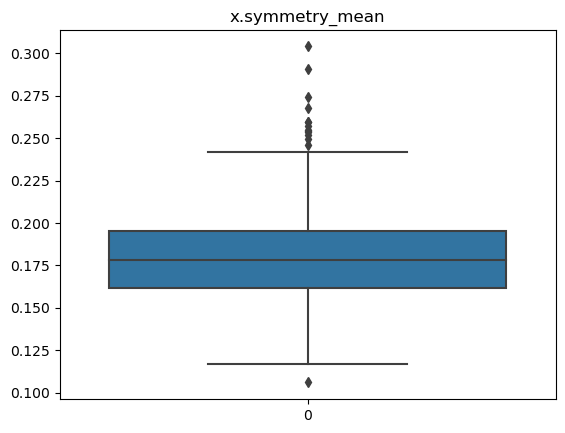

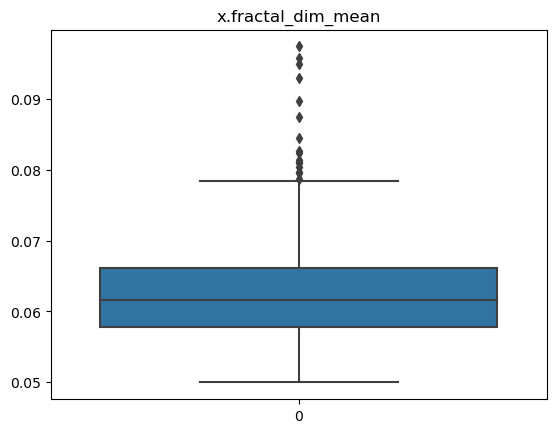

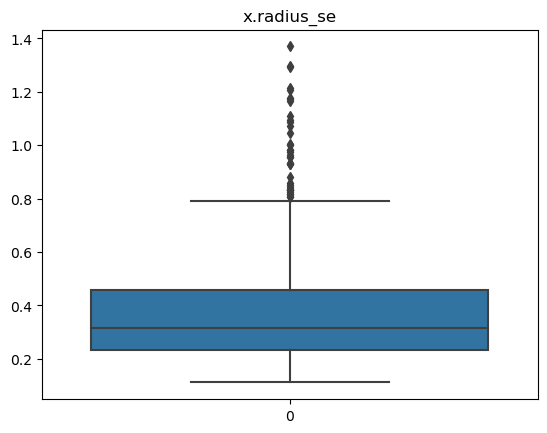

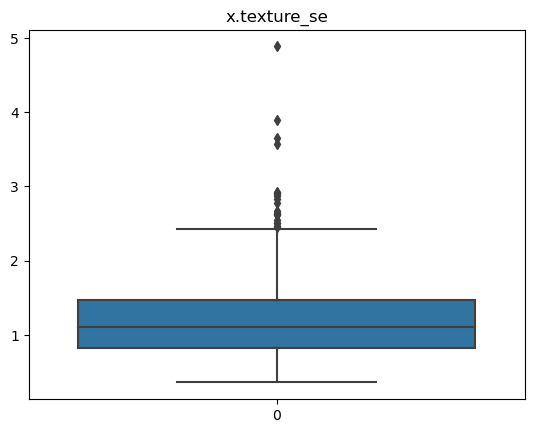

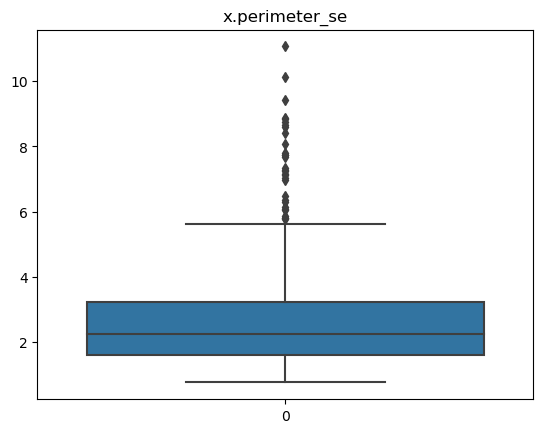

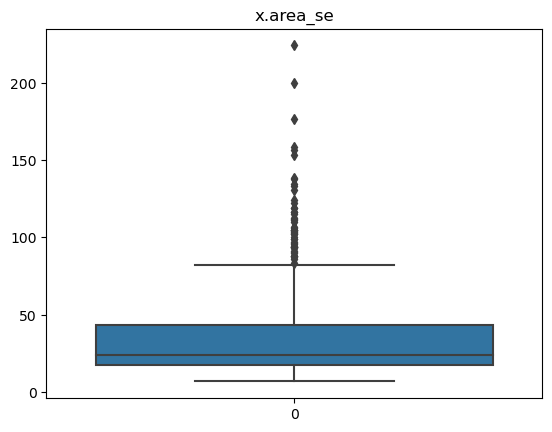

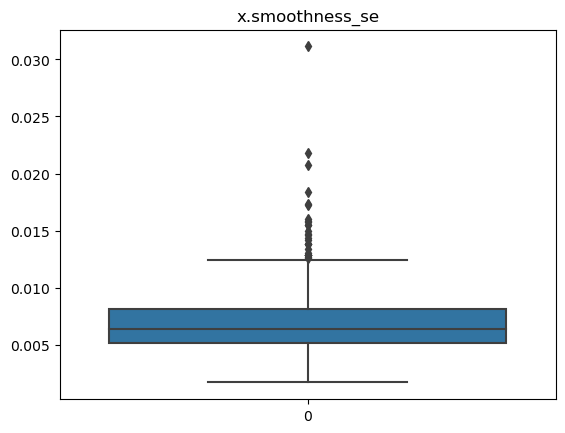

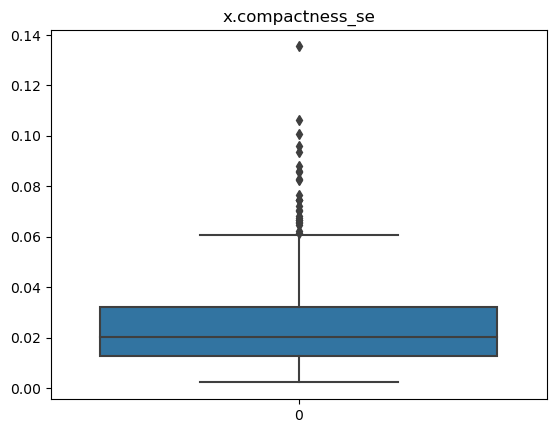

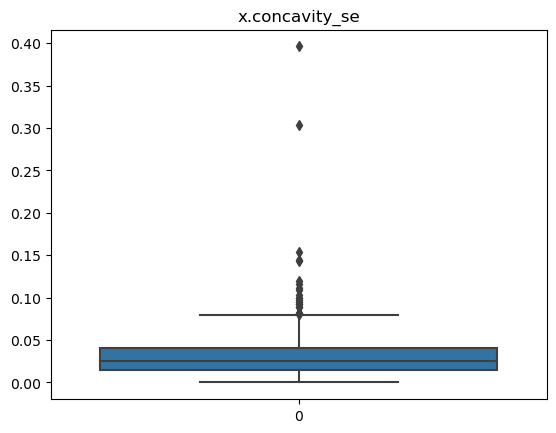

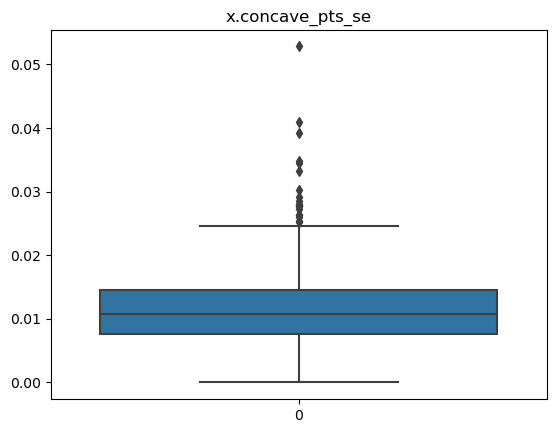

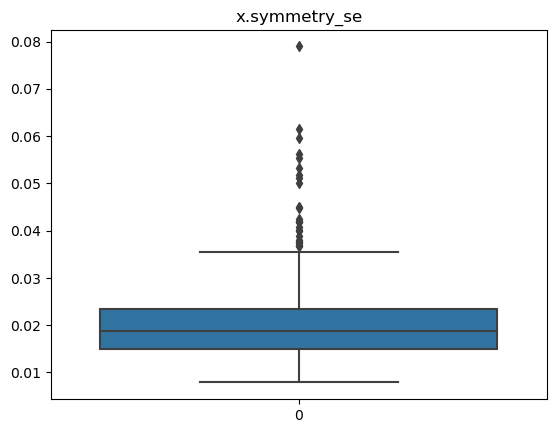

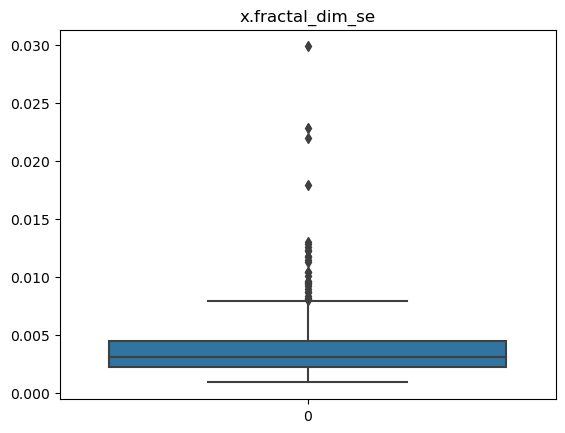

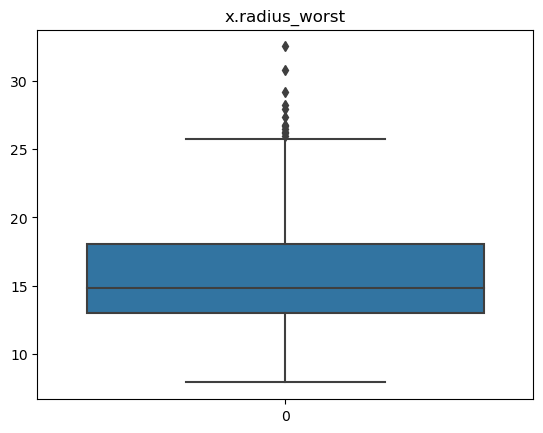

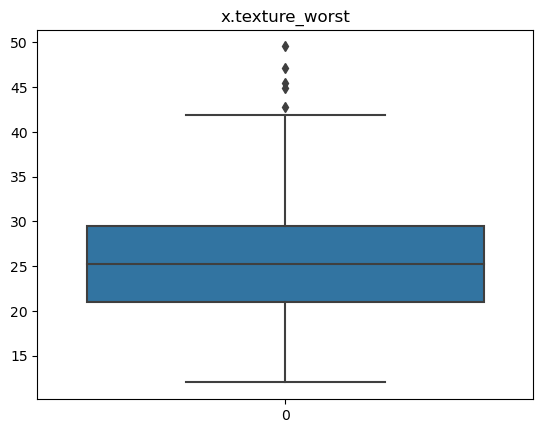

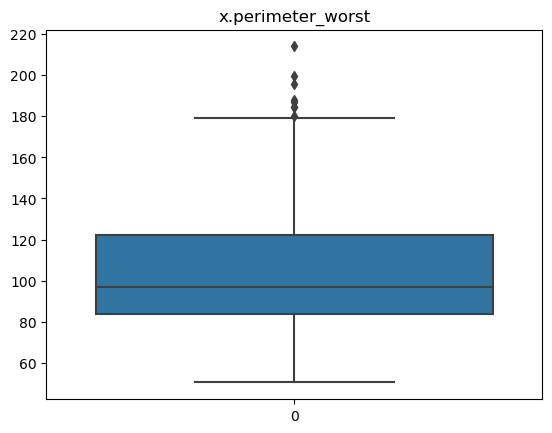

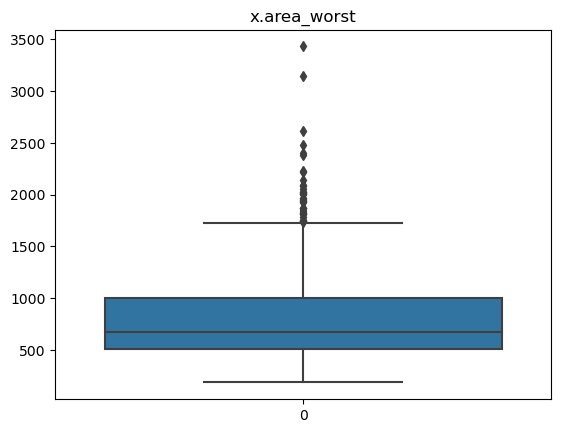

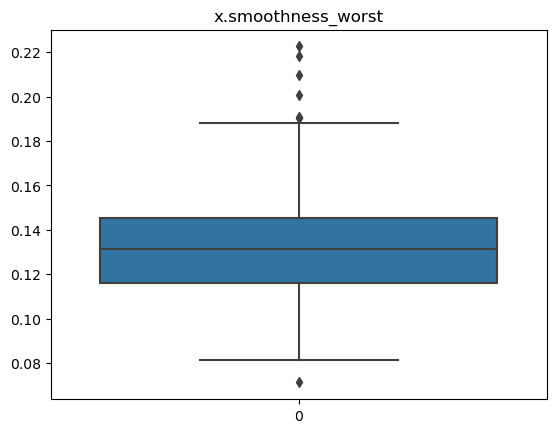

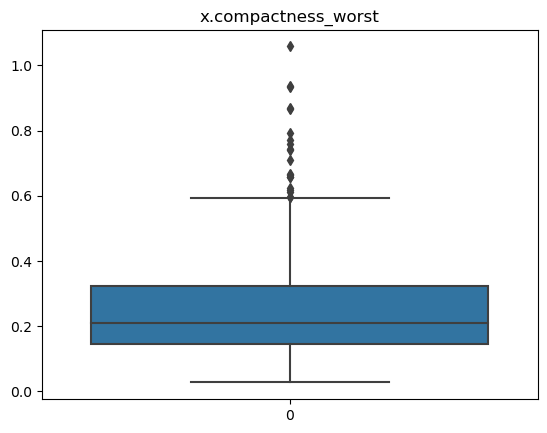

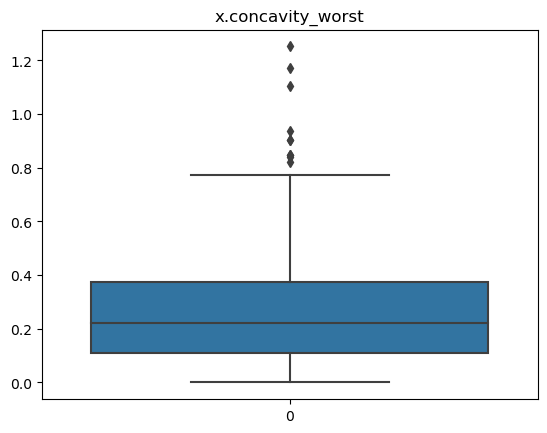

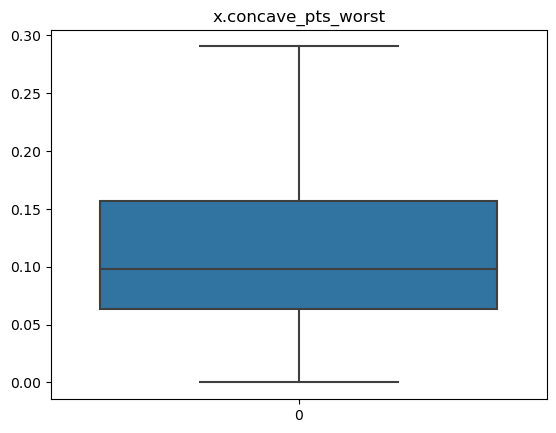

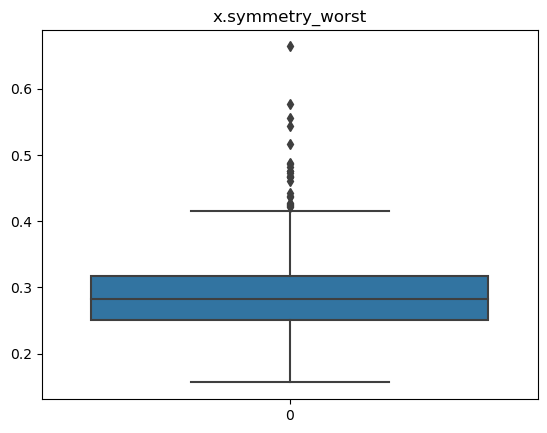

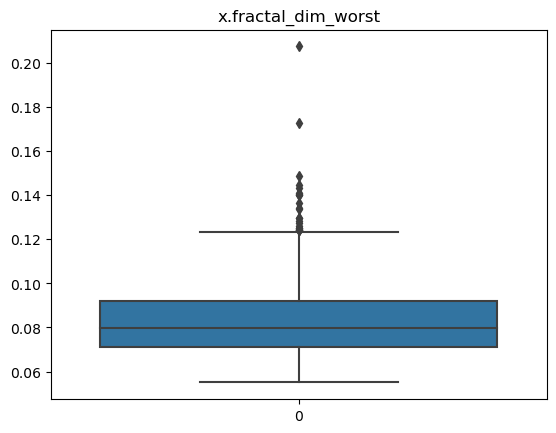

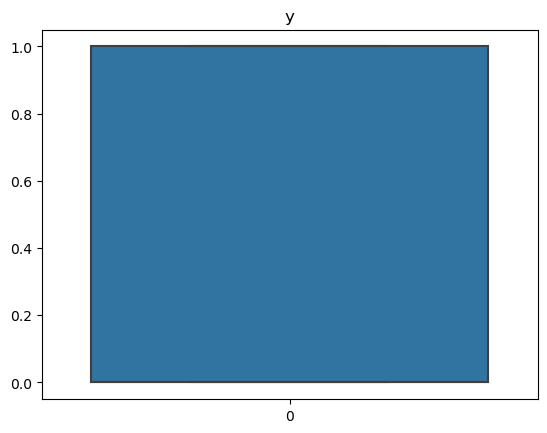

In [151]:
for c in columns:
    sb.boxplot(df[c])
    plt.title(c)
    plt.show()

Apres cette operation, on se retrouve qu'avec 377 lignes

(569, 32)
(399, 32)


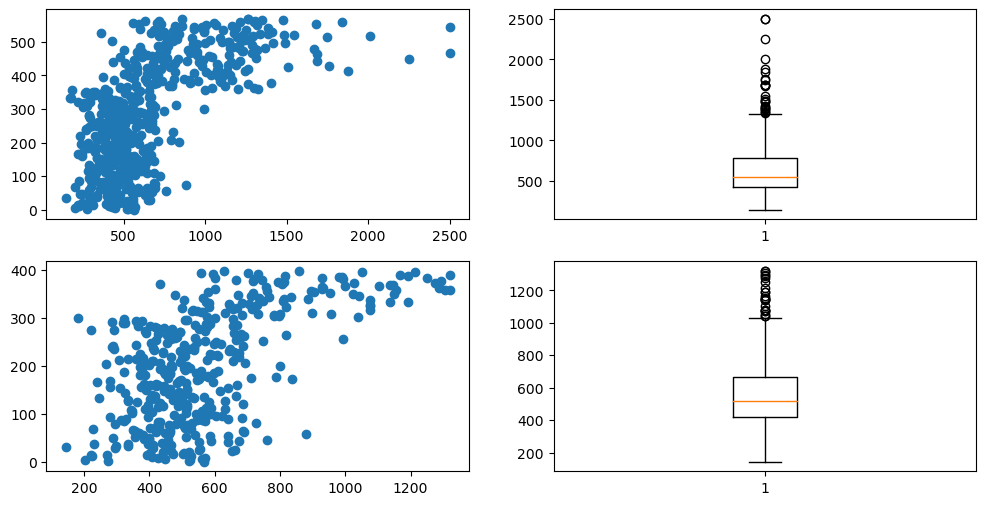

In [47]:
result = df.describe()
Q1 = result.loc["25%"]
Q3 = result.loc["75%"]
IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR

fig = plt.figure(figsize=(12, 6))
fig.add_subplot(221)
plt.scatter(df["x.area_mean"], range(df.shape[0]))
fig.add_subplot(222)
plt.boxplot(df["x.area_mean"])

print(df.shape)

for i in range(df.shape[0]):
    for j in df.columns:
        try:
            if df[j][i] < low_limit[k] or df[j][i] > up_limit[j] :
                try:
                    df = df.drop(i)
                except(KeyError):
                    pass
                except(IndexError):
                    break
        except:
            pass

fig.add_subplot(223)
plt.scatter(df["x.area_mean"], range(df.shape[0]))
fig.add_subplot(224)
plt.boxplot(df["x.area_mean"])
print(df.shape)

## Normalisons nos données!

Nous utiliserons le **Min-Max normalization**

* Intervalle sera [0, 1]

In [59]:
result = df.describe()
min_vals = result.loc["min"]
max_vals = result.loc["max"]
min_int = 0
max_int = 1

df = ((df - min_vals) / (max_vals - min_vals)) * (max_int - min_int) - min_int

df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,0.000000,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,...,0.192964,0.245480,0.129276,0.480948,0.145540,0.190895,0.442612,0.278336,0.115112,0.0
1,0.001761,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,...,0.225746,0.227501,0.109443,0.396421,0.242852,0.150958,0.250275,0.319141,0.175718,0.0
2,0.003521,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,...,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826,0.0
3,0.005282,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,...,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618,0.0
4,0.007042,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,...,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951,0.0


## Nettoyage de bruits (en appliquant l’une des méthodes de Binning)

***Equal width binning***

In [105]:
k = 10
result = df.describe()
min_vals = result.loc["min"]
max_vals = result.loc["max"]
w = (max_vals - min_vals) / k

bins = []
b = [[],[],[],[],[],[],[],[],[],[]]

for c in df.columns:
    for val in df[:-1][c]:
        for k in range(1, 11):
            if val < min_vals[c] + k * w[c] and val >= min_vals[c] + (k-1) * w[c]:
                b[k-1].append(val)
    
    bins.append(b)
            

In [139]:
freq = []
for b in bins:
    temp = []
    for i in range(10):
        temp.append(len(b[i]))
    freq.append(temp)
    
freq

[[4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455, 864, 438, 228, 125, 86],
 [4401, 4562, 3464, 2312, 1455,